In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data1= pd.read_csv(r'C:\Users\srivi\OneDrive\Documents\Software Defect Prediction\Code-kc2\kc2.csv')

data1.defects=data1['defects']*1     

X = data1.iloc[:,:-1]
y = data1.iloc[:,-1]

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm , y_sm = smote.fit_resample(X,y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)



In [2]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNN_pred = knn.predict(X_test)

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

CM = confusion_matrix(y_test,KNN_pred)
CM

array([[71, 10],
       [15, 70]], dtype=int64)

In [4]:
print('Accuracy score:',accuracy_score(y_test,KNN_pred))
print('F1_score:',f1_score(y_test,KNN_pred, pos_label='yes'))
print('precision_score:',precision_score(y_test,KNN_pred, pos_label='yes'))
print('recall_score:',recall_score(y_test,KNN_pred, pos_label='yes'))

Accuracy score: 0.8493975903614458
F1_score: 0.8484848484848485
precision_score: 0.875
recall_score: 0.8235294117647058


In [5]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

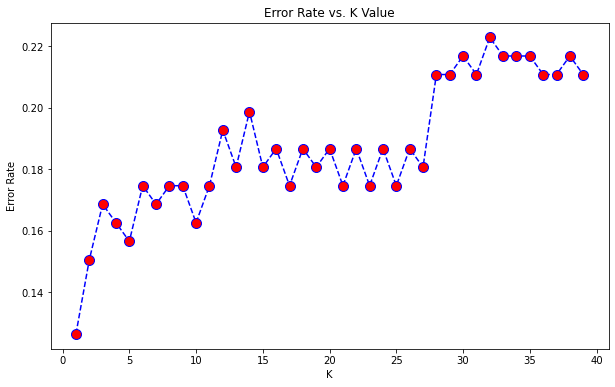

In [6]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')